In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df=pd.read_csv("GoldPrice_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
correlation = df.drop('Date', axis=1).corr()

<Axes: >

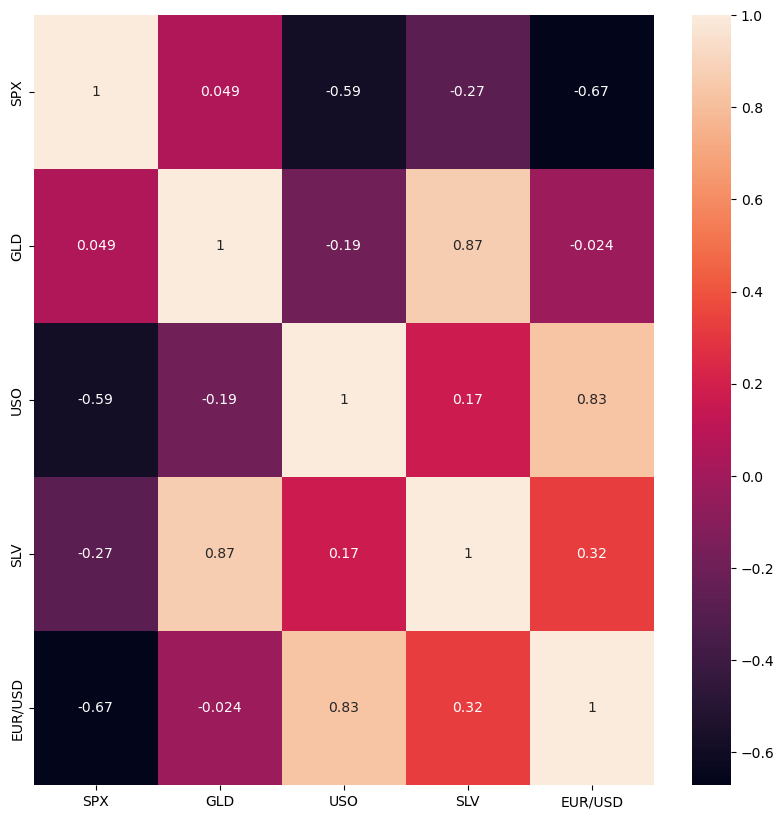

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/72/6lj5mvf108l8kc85yhykcl7c0000gn/T/ipykernel_12900/3247688425.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

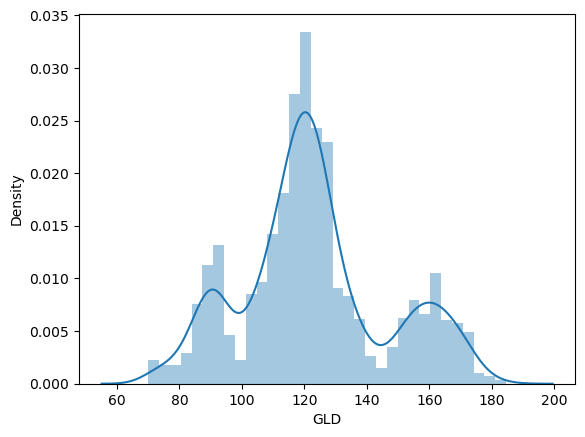

In [13]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'])

In [14]:
x= df.drop(['Date','GLD'],axis=1)
y= df['GLD']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [16]:
#model training:-
regressor=RandomForestRegressor(n_estimators=100)

In [17]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
# prediction on Test Data
test_data_prediction = regressor.predict(x_test)

In [19]:
print(test_data_prediction)

[168.4611992   82.14489971 116.11050048 127.58270061 120.69420123
 154.86769743 150.23269835 126.04870029 117.33549873 126.03390042
 116.52860128 172.15570066 141.51959921 167.87259794 115.20319994
 117.57200065 138.0528035  170.41080111 159.50290302 160.13869958
 155.07209965 125.27980022 175.74499948 157.10300403 125.22230071
  94.00339968  77.37129995 120.5211003  119.1257991  167.38640009
  88.11330029 125.22460014  91.2275009  117.84820033 121.0829994
 136.17600072 115.43400093 115.08650089 147.25869951 107.15300098
 104.1756027   87.21529795 126.44700071 118.11350034 154.51810003
 119.76729994 108.39059988 108.0443983   93.30160052 127.13839767
  74.88290055 113.5600991  121.13070042 111.33369889 118.82439896
 120.72739925 159.14380057 169.27580048 147.11759672  85.76619839
  94.39010049  86.66759893  90.56330023 118.91540114 126.44410071
 127.52660015 169.36509914 122.28249939 117.48339879  98.65970001
 167.85750141 143.00069785 131.76570256 121.1730024  120.71649941
 119.562300

In [ ]:
# R squared error
error_score=metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889152546101356
